In [13]:
import urllib.request as url
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [2]:
url.urlopen('https://api.covid19india.org/states_daily.json')

In [3]:
response = url.urlopen('https://api.covid19india.org/states_daily.json')

In [4]:
json_data = json.load(response)

In [5]:
type(json_data)

dict

In [7]:
json_data.keys()

dict_keys(['states_daily'])

In [8]:
df = pd.DataFrame(json_data['states_daily'])

In [9]:
df.shape

(471, 41)

In [10]:
df.columns

Index(['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'date', 'dd', 'dl', 'dn',
       'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh', 'ml',
       'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk', 'status', 'tg',
       'tn', 'tr', 'tt', 'un', 'up', 'ut', 'wb'],
      dtype='object')

In [11]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,...,0,Recovered,1,0,0,4,0,0,0,0


In [12]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df['dl'] = df['dl'].astype(numpy.int32)

In [15]:
df['dl'][0]

7

In [16]:
df['mh'][0]

'14'

In [17]:
df['mh'] = df['mh'].astype(numpy.int32)
df['tn'] = df['tn'].astype(numpy.int32)

In [18]:
confirmed = df[df['status'] == 'Confirmed']
deceased = df[df['status'] == 'Deceased']

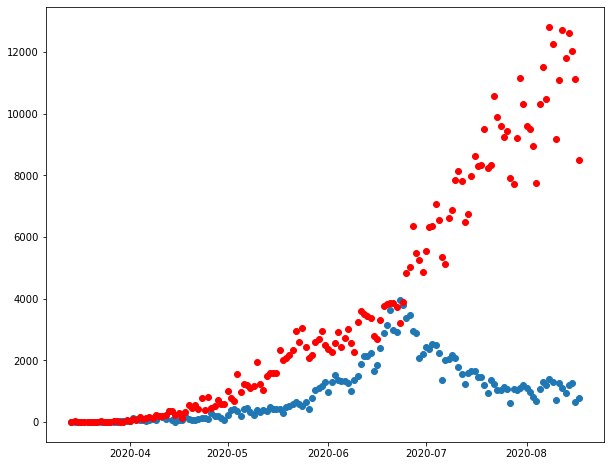

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(confirmed['date'], confirmed['dl'])
plt.scatter(confirmed['date'], confirmed['mh'],color = 'red')
plt.show()

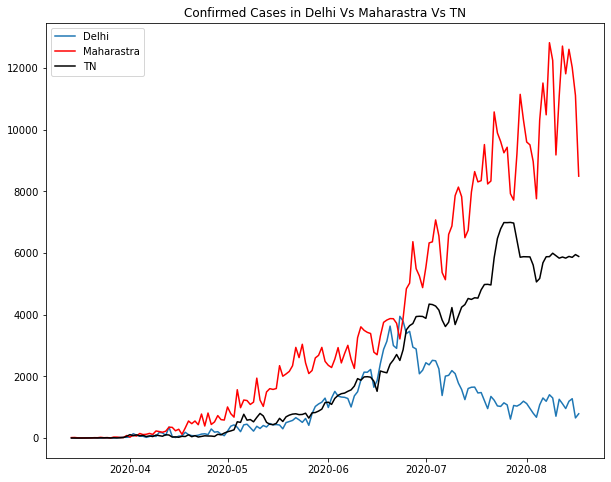

In [23]:
plt.figure(figsize=(10,8))
plt.plot(confirmed['date'], confirmed['dl'], label='Delhi')
plt.plot(confirmed['date'], confirmed['mh'],color = 'red', label='Maharastra')
plt.plot(confirmed['date'], confirmed['tn'],color = 'black', label='TN')
plt.title('Confirmed Cases in Delhi Vs Maharastra Vs TN')
plt.legend()
plt.show()

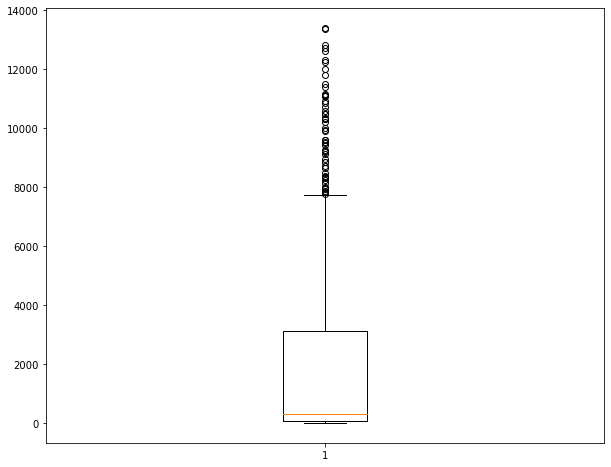

In [26]:
plt.figure(figsize=(10,8))
plt.boxplot(df['mh'])
plt.show()